In [1]:
import  warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [133]:
user = pd.read_csv('/Users/check4068/Desktop/Product Sense/5.Funnel Analysis/user_table.csv',parse_dates=['date'])
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [3]:
home = pd.read_csv('/Users/check4068/Desktop/Product Sense/5.Funnel Analysis/home_page_table.csv')
home.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [4]:
search = pd.read_csv('/Users/check4068/Desktop/Product Sense/5.Funnel Analysis/search_page_table.csv')
search.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [5]:
payment = pd.read_csv('/Users/check4068/Desktop/Product Sense/5.Funnel Analysis/payment_page_table.csv')
payment.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [20]:
confirm = pd.read_csv('/Users/check4068/Desktop/Product Sense/5.Funnel Analysis/payment_confirmation_table.csv')
confirm.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


# 1.Data Process

In [21]:
data = pd.merge(left=user, right=home, how='left', on='user_id')
data = pd.merge(left=data, right=search, how='left', on='user_id', suffixes=('_home', '_search'))
data = pd.merge(left=data, right=payment, how='left', on='user_id')
data = pd.merge(left=data, right=confirm, how='left', on='user_id', suffixes=('_payment', '_confirmation'))
data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [ ]:
data['dayofweek'] = data['date'].apply(lambda x: x.dayofweek)
data['week'] = data['date'].apply(lambda x: x.week)
del data['date']

In [36]:
data

,user_id,device,sex,page_home,page_search,page_payment,page_confirmation,dayofweek,week
0,450007,Desktop,Female,home_page,NaN,NaN,NaN,5,9
1,756838,Desktop,Male,home_page,NaN,NaN,NaN,1,3
2,568983,Desktop,Male,home_page,search_page,NaN,NaN,3,15
3,190794,Desktop,Female,home_page,search_page,NaN,NaN,2,8
4,537909,Desktop,Male,home_page,NaN,NaN,NaN,3,3
...,...,...,...,...,...,...,...,...,...
90395,307667,Desktop,Female,home_page,NaN,NaN,NaN,0,14
90396,642989,Desktop,Female,home_page,search_page,NaN,NaN,6,6
90397,659645,Desktop,Male,home_page,search_page,NaN,NaN,0,16
90398,359779,Desktop,Male,home_page,NaN,NaN,NaN,0,13


# 2.Analysis
## Visit Probability for Each Page

In [16]:
conv_ratio = 1 - pd.DataFrame(data.isnull().sum()).rename(columns={0: 'conversion'}) / len(data)
conv_ratio = conv_ratio.reset_index()[4:]
conv_ratio

,index,conversion
4,page_home,1.000000
5,page_search,0.500000
6,page_payment,0.066704
7,page_confirmation,0.005000


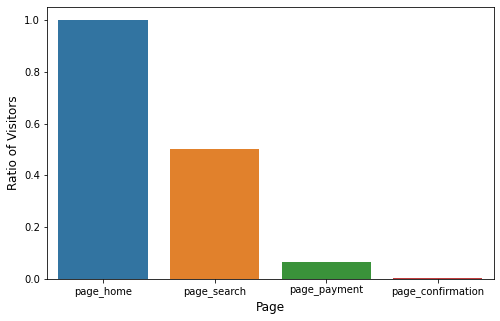

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='index', y='conversion', data=conv_ratio, ax=ax)
ax.set_xlabel('Page', fontsize=12)
ax.set_ylabel('Ratio of Visitors', fontsize=12)
plt.show()

## Conversion Rate for Each Page

In [22]:
def conversion_rate(df):
    """ function to calculate conversion rates for home, search and payment page"""
    rates = []
    tmp = df[~df['page_home'].isnull()]
    rates.append(1 - tmp['page_search'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_search'].isnull()]
    rates.append(1 - tmp['page_payment'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_payment'].isnull()]
    rates.append(1 - tmp['page_confirmation'].isnull().sum() / len(tmp))
    
    return rates

### 1.Overall

In [47]:
rates = conversion_rate(data)
names = ['home', 'search', 'payment']
maps = {'Page': ['home', 'search', 'payment'], 'Conversion Rate': rates}
overall_conv = pd.DataFrame(maps, columns=['Page', 'Conversion Rate'])

overall_conv

,Page,Conversion Rate
0,home,0.500000
1,search,0.133407
2,payment,0.074959


### 2.Device

In [50]:
desk_rates = conversion_rate(data[data['device'] == 'Desktop'])
mobile_rates = conversion_rate(data[data['device'] == 'Mobile'])
names = ['home', 'search', 'payment']
print('{0:^10s} | {1:^10s} | {2:^10s}'.format('Page', 'Desktop', 'Mobile'))
print('-' * 40)
for name, desk_rate, mobile_rate in zip(names, desk_rates, mobile_rates):
    print('{0:10s} | {1:10.6f} | {2:10.6f}'.format(name, desk_rate, mobile_rate))

   Page    |  Desktop   |   Mobile  
----------------------------------------
home       |   0.500000 |   0.500000
search     |   0.100000 |   0.200000
payment    |   0.049834 |   0.100000


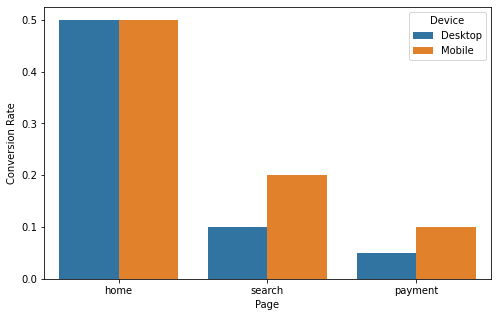

In [28]:
# Visualization
maps = {'Page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'Device': ['Desktop', 'Desktop', 'Desktop', 'Mobile', 'Mobile', 'Mobile'], 
        'Conversion Rate': desk_rates + mobile_rates}
device_conv = pd.DataFrame(maps, columns=['Page', 'Device', 'Conversion Rate'])

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=device_conv, ax=ax, hue='Device')
plt.show()

### 3.Sex

In [55]:
male_rates = conversion_rate(data[data['sex'] == 'Male'])
female_rates = conversion_rate(data[data['sex'] == 'Female'])
names = ['home', 'search', 'payment']
print('{0:^10s} | {1:^10s} | {2:^10s}'.format('Page', 'Male', 'Female'))
print('-' * 40)
for name, male_rate, female_rate in zip(names, male_rates, female_rates):
    print('{0:10s} | {1:10.6f} | {2:10.6f}'.format(name, male_rate, female_rate))

   Page    |    Male    |   Female  
----------------------------------------
home       |   0.496944 |   0.503073
search     |   0.130083 |   0.136708
payment    |   0.072014 |   0.077742


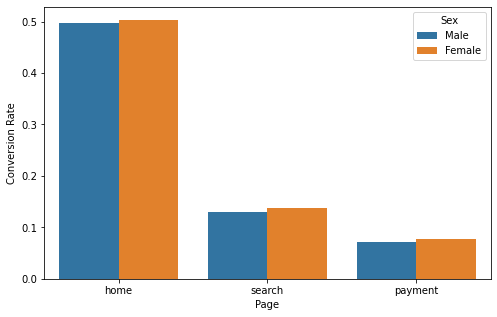

In [39]:
# Visualization
maps = {'Page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'Sex': ['Male', 'Male', 'Male', 'Female', 'Female', 'Female'], 
        'Conversion Rate': male_rates + female_rates}
sex_conv = pd.DataFrame(maps, columns=['Page', 'Sex', 'Conversion Rate'])

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=sex_conv, ax=ax, hue='Sex')
plt.show()

### 4.Date

In [58]:
week=[]
for i in range(52):
     week.append(conversion_rate(data[data['week'] == i]))
week

[[nan, nan, nan],
 [0.6028905712319339, 0.17123287671232879, 0.08333333333333337],
 [0.593866719087871, 0.1674942072161536, 0.09288537549407117],
 [0.6055191582291046, 0.17147540983606557, 0.0669216061185468],
 [0.5914575751771691, 0.19300518134715028, 0.08221476510067116],
 [0.6107784431137724, 0.17647058823529416, 0.07168458781362008],
 [0.6028061666377966, 0.17298850574712643, 0.07641196013289031],
 [0.6026954177897574, 0.17650566487775787, 0.0658783783783784],
 [0.6065573770491803, 0.18125734430082252, 0.06969205834683956],
 [0.5795454545454546, 0.16402116402116407, 0.07210626185958258],
 [0.38716640502354793, 0.0780537252914344, 0.09090909090909094],
 [0.3979211610119632, 0.08181370133070476, 0.06024096385542166],
 [0.40130537974683544, 0.0625924100542139, 0.07086614173228345],
 [0.3858006631558416, 0.062184024266936255, 0.06504065040650409],
 [0.3893621048646603, 0.07243558580456977, 0.10067114093959728],
 [0.40090943539219404, 0.06521739130434778, 0.10144927536231885],
 [0.40801

In [78]:
weeks={}
for i in range(1,19):
     weeks[i]=(conversion_rate(data[data['week'] == i]))
weeks

{1: [0.6028905712319339, 0.17123287671232879, 0.08333333333333337],
 2: [0.593866719087871, 0.1674942072161536, 0.09288537549407117],
 3: [0.6055191582291046, 0.17147540983606557, 0.0669216061185468],
 4: [0.5914575751771691, 0.19300518134715028, 0.08221476510067116],
 5: [0.6107784431137724, 0.17647058823529416, 0.07168458781362008],
 6: [0.6028061666377966, 0.17298850574712643, 0.07641196013289031],
 7: [0.6026954177897574, 0.17650566487775787, 0.0658783783783784],
 8: [0.6065573770491803, 0.18125734430082252, 0.06969205834683956],
 9: [0.5795454545454546, 0.16402116402116407, 0.07210626185958258],
 10: [0.38716640502354793, 0.0780537252914344, 0.09090909090909094],
 11: [0.3979211610119632, 0.08181370133070476, 0.06024096385542166],
 12: [0.40130537974683544, 0.0625924100542139, 0.07086614173228345],
 13: [0.3858006631558416, 0.062184024266936255, 0.06504065040650409],
 14: [0.3893621048646603, 0.07243558580456977, 0.10067114093959728],
 15: [0.40090943539219404, 0.06521739130434778

In [79]:
df = pd.DataFrame(weeks)

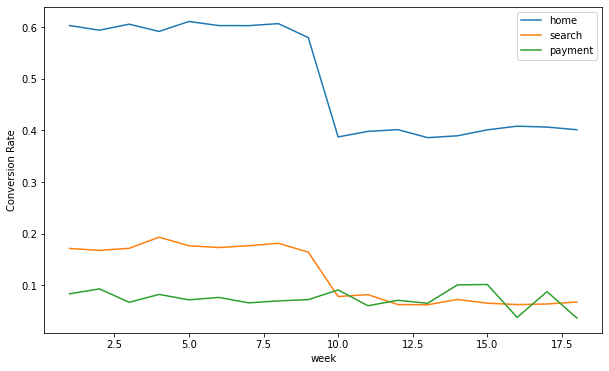

In [132]:
# Week
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
a=np.arange(1,19)
plt.figure(figsize=(10, 6))
plt.plot(a,df.iloc[0],label='home')
plt.plot(a,df.iloc[1],label='search')
plt.plot(a,df.iloc[2],label='payment')
plt.ylabel('Conversion Rate')
plt.xlabel('week')
plt.legend()
plt.show()

In [115]:
weeks={}
for i in range(7):
     weeks[i]=(conversion_rate(data[data['dayofweek'] == i]))
weeks

{0: [0.5004245465071401, 0.1340428813820762, 0.08860759493670889],
 1: [0.49239977947546665, 0.1364363403710812, 0.0808909730363423],
 2: [0.4937261320240044, 0.13228097868981847, 0.06443914081145585],
 3: [0.49962808687890514, 0.1338395116867649, 0.07341490545050056],
 4: [0.5024313725490196, 0.13596628161098967, 0.06199770378874858],
 5: [0.5112881806108898, 0.1291061879297173, 0.08284023668639051],
 6: [0.5000773874013311, 0.13231197771587744, 0.07251461988304098]}

In [116]:
df2 = pd.DataFrame(weeks)

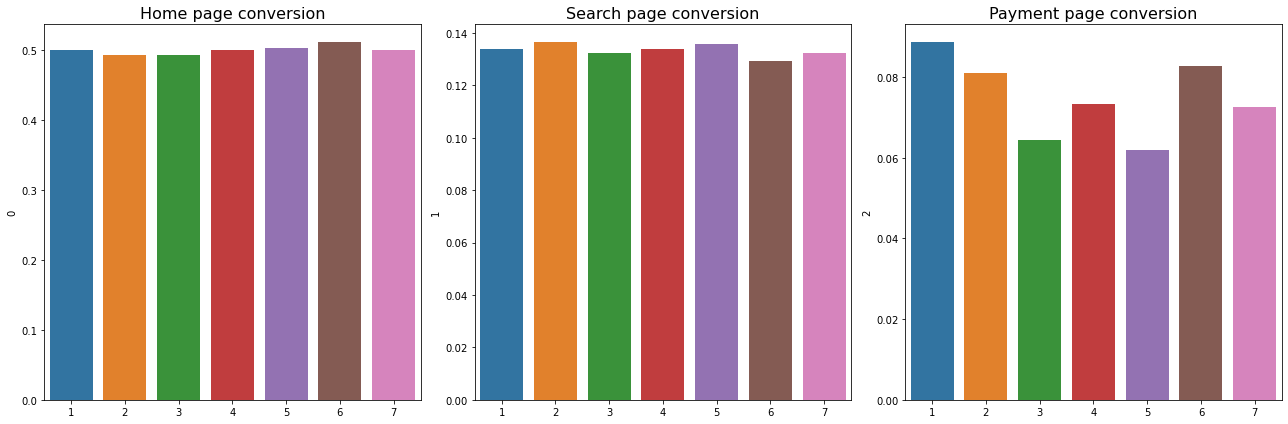

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
sns.barplot(a,df2.iloc[0],ax=ax[0])
ax[0].set_title('Home page conversion', fontsize=16)

sns.barplot(a,df2.iloc[1],ax=ax[1])
ax[1].set_title('Search page conversion', fontsize=16)
sns.barplot(a,df2.iloc[2],ax=ax[2])
ax[2].set_title('Payment page conversion', fontsize=16)

plt.tight_layout()
plt.show()

# 3.Summary

The conversion rate on desktop is significantly lower than mobile. Thus, we should improve the user experience for desktop device in search and payment page